# Importing libraries

In [2]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [4]:
#@ INITIALIZING PATH TO DATASET:
train_dir = './train'
test_dir = './test'

In [28]:
def make_model(input_size=150, learning_rate=0.002):

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(input_size, input_size, 3))(inputs)
    pools = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
    vectors = keras.layers.Flatten()(pools)

    inner = keras.layers.Dense(units=64, activation='relu')(vectors)

    outputs = keras.layers.Dense(units=1, activation='sigmoid')(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [29]:
model = make_model(learning_rate=0.002)

Answer for Question1: binary_crossentropy.

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                             

Answer for Question2: 11,215,873

In [32]:

#@ INITIALIZING IMAGE DATAGENERATOR:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [34]:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        shuffle=True)

Found 918 images belonging to 2 classes.


In [35]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [36]:
#@ TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10


184/184 [==============================] - 10s 52ms/step - loss: 0.6827 - accuracy: 0.5349 - val_loss: 0.6553 - val_accuracy: 0.6133
Epoch 2/10
184/184 [==============================] - 10s 52ms/step - loss: 0.6543 - accuracy: 0.6016 - val_loss: 0.6117 - val_accuracy: 0.6601
Epoch 3/10
184/184 [==============================] - 9s 51ms/step - loss: 0.6224 - accuracy: 0.6451 - val_loss: 0.5768 - val_accuracy: 0.6885
Epoch 4/10
184/184 [==============================] - 9s 51ms/step - loss: 0.5688 - accuracy: 0.7082 - val_loss: 0.5756 - val_accuracy: 0.6776
Epoch 5/10
184/184 [==============================] - 9s 51ms/step - loss: 0.5376 - accuracy: 0.7367 - val_loss: 0.5355 - val_accuracy: 0.7277
Epoch 6/10
184/184 [==============================] - 9s 51ms/step - loss: 0.5157 - accuracy: 0.7539 - val_loss: 0.5257 - val_accuracy: 0.7495
Epoch 7/10
184/184 [==============================] - 10s 52ms/step - loss: 0.4885 - accuracy: 0.7775 - val_loss: 0.5855 - val_accuracy: 0.7037
Epoch 8

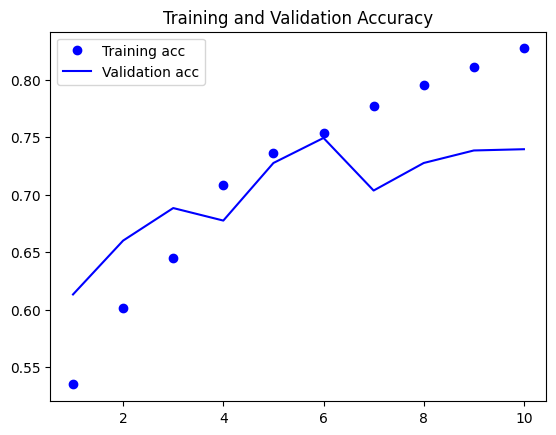

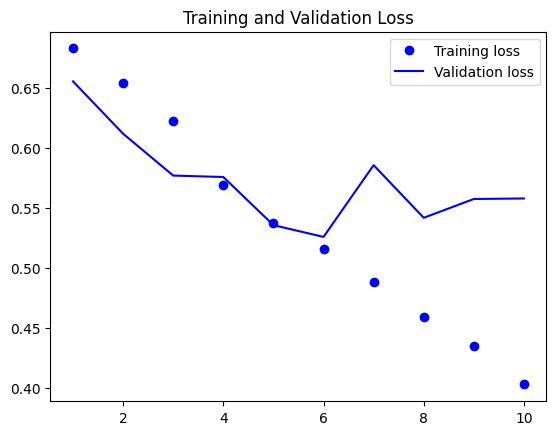

In [45]:
#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [46]:
acc_median = np.median(acc)
acc_median

0.7453086674213409

In [47]:
loss_std = np.std(loss)
loss_std

0.08978396510040682

In [49]:
train_datagen_2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen_2 = train_datagen_2.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [50]:
history_2 = model.fit(train_gen_2,
                      epochs=10,
                      validation_data=validation_generator)

Epoch 1/10
184/184 [==============================] - 14s 75ms/step - loss: 0.5052 - accuracy: 0.7675 - val_loss: 0.4863 - val_accuracy: 0.7756
Epoch 2/10
184/184 [==============================] - 14s 74ms/step - loss: 0.4809 - accuracy: 0.7881 - val_loss: 0.4838 - val_accuracy: 0.7625
Epoch 3/10
184/184 [==============================] - 14s 74ms/step - loss: 0.4776 - accuracy: 0.7740 - val_loss: 0.4642 - val_accuracy: 0.7821
Epoch 4/10
184/184 [==============================] - 14s 74ms/step - loss: 0.4836 - accuracy: 0.7732 - val_loss: 0.5473 - val_accuracy: 0.7462
Epoch 5/10
184/184 [==============================] - 14s 73ms/step - loss: 0.4742 - accuracy: 0.7879 - val_loss: 0.4873 - val_accuracy: 0.7712
Epoch 6/10
184/184 [==============================] - 14s 74ms/step - loss: 0.4783 - accuracy: 0.7702 - val_loss: 0.4708 - val_accuracy: 0.7767
Epoch 7/10
184/184 [==============================] - 14s 74ms/step - loss: 0.4672 - accuracy: 0.7873 - val_loss: 0.4552 - val_accuracy:

In [51]:
np.mean(history_2.history['val_loss'])

0.47893195450305937

In [52]:
np.mean(history_2.history['val_accuracy'][5:])

0.7832244038581848